In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#df = pd.read_csv(r"C:\Users\piush\Desktop\Dataset\UberData\dataframe.csv")
import random

filename = r"C:\Users\piush\Desktop\Dataset\UberData\dataframe.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(filename, skiprows=skip)

In [3]:
df = df.set_index(['Date'])

In [4]:
df = df.drop(['Unnamed: 0'])

In [5]:
df.columns

Index(['Unnamed: 0', 'Time', 'pickup_location_id', 'dispatch_base',
       'affiliate_base', 'borough_x', 'zone', 'service_zone', 'nta_code',
       'nta_name', 'borough_y', 'population', 'under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years',
       'median_age', 'people_per_acre', 'households', 'less_than_10,000',
       '10000_to_14999', '15000_to_24999', '25000_to_34999', '35000_to_49999',
       '50000_to_74999', '75000_to_99999', '100000_to_149999',
       '150000_to_199999', '200000_or_more', 'median_income', 'mean_income'],
      dtype='object')

In [6]:
df1 = df.drop('Unnamed: 0', axis=1)

In [7]:
df1 = df[['Time', 'pickup_location_id', 'dispatch_base',
       'affiliate_base', 'borough_x', 'zone', 'service_zone', 'nta_code',
       'nta_name', 'borough_y', 'population',
       'median_age', 'people_per_acre', 'households', 'less_than_10,000',
       '10000_to_14999', '15000_to_24999', '25000_to_34999', '35000_to_49999',
       '50000_to_74999', '75000_to_99999', '100000_to_149999',
       '150000_to_199999', '200000_or_more', 'median_income', 'mean_income', 'under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years']]

In [8]:
df1.head(5)

,Time,pickup_location_id,dispatch_base,affiliate_base,borough_x,zone,service_zone,nta_code,nta_name,borough_y,...,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years
Date,,,,,,,,,,,,,,,,,,,,,
2015-04-15,07:35:00,140,B02764,B02764,Manhattan,Lenox Hill East,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,Manhattan,...,5054,11182,10029,7096,5631,4900,4518,4555,4814,12422
2015-03-11,02:14:00,141,B02764,B02764,Manhattan,Lenox Hill West,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,Manhattan,...,5054,11182,10029,7096,5631,4900,4518,4555,4814,12422
2015-06-24,07:10:00,141,B02764,B02764,Manhattan,Lenox Hill West,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,Manhattan,...,5054,11182,10029,7096,5631,4900,4518,4555,4814,12422
2015-01-23,12:01:14,140,B02598,B02598,Manhattan,Lenox Hill East,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,Manhattan,...,5054,11182,10029,7096,5631,4900,4518,4555,4814,12422
2015-02-22,18:58:50,140,B02764,NaN,Manhattan,Lenox Hill East,Yellow Zone,MN31,Lenox Hill-Roosevelt Island,Manhattan,...,5054,11182,10029,7096,5631,4900,4518,4555,4814,12422


In [9]:
df1_lhw = df1[df1['zone'] == 'Lenox Hill West']

In [12]:
df1_LHW = np.array((df1.loc[df1['zone'] == 'Lenox Hill West',['under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years']].sum())/(df1.loc[df1['zone'] == 'Lenox Hill West',['under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years']].sum()).sum())

In [13]:
df_LHW_DF= pd.DataFrame((df1.loc[df1['zone'] == 'Lenox Hill West',['under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years']].sum())/(df1.loc[df1['zone'] == 'Lenox Hill West',['under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years']].sum()).sum())
df_LHW_DF.columns = ['Lenox Hill West']


In [14]:
df_LHW_DF

,Lenox Hill West
under_5_years,0.054116
5-9_years,0.032784
10-14_years,0.023858
15-19_years,0.020106
20-24_years,0.062572
25-29_years,0.138441
30-34_years,0.124166
35-39_years,0.087853
40-44_years,0.069716
45-49_years,0.060665


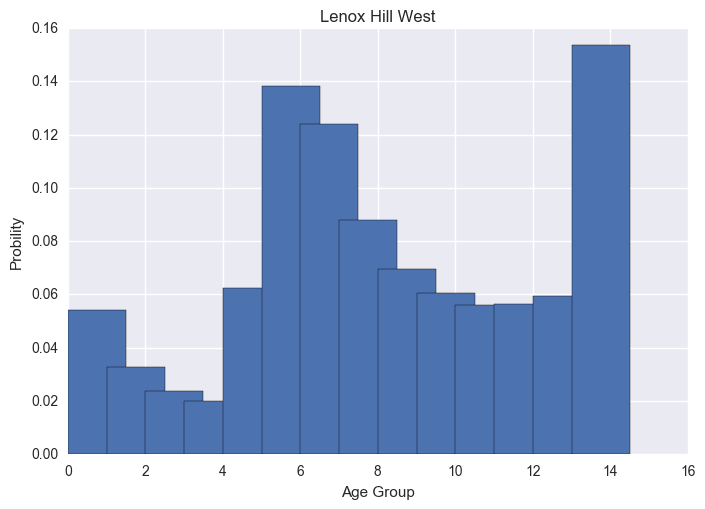

In [18]:
plt.bar(range(len(df1_LHW)),df1_LHW, width=1.5)
plt.ylabel('Probility')
plt.xlabel('Age Group')
plt.title('Lenox Hill West')

In [19]:
prob_age_NY = np.array([0.04738689183900135,0.035415074473854766,0.0312727651602216,0.04343809179264837,0.08581579808799687,0.12730690741653344,
                       0.10836075158613877,0.08424227198945633,0.07207551717609113,0.06548583297695872,0.06080245213487197,0.05737072758724158,
                       0.053404473023849666,0.12762244475513546])

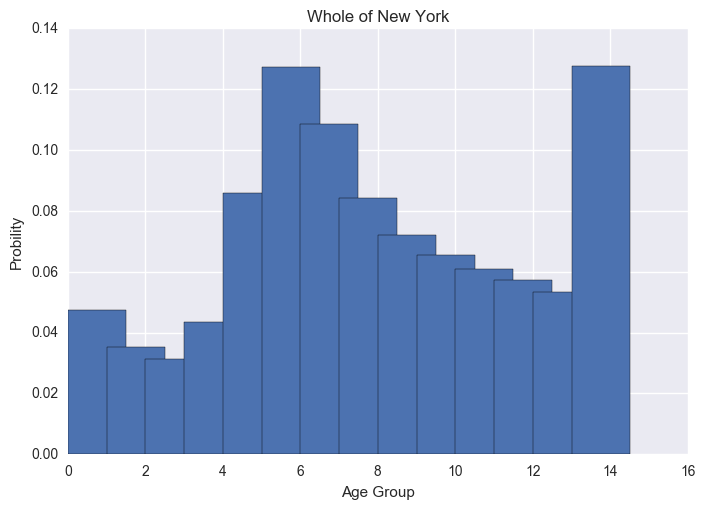

In [21]:
plt.bar(range(len(prob_age_NY)),prob_age_NY, width=1.5)
plt.ylabel('Probility')
plt.xlabel('Age Group')
plt.title('Whole of New York')

In [25]:
probaibilty_difference = prob_age_NY- df1_LHW

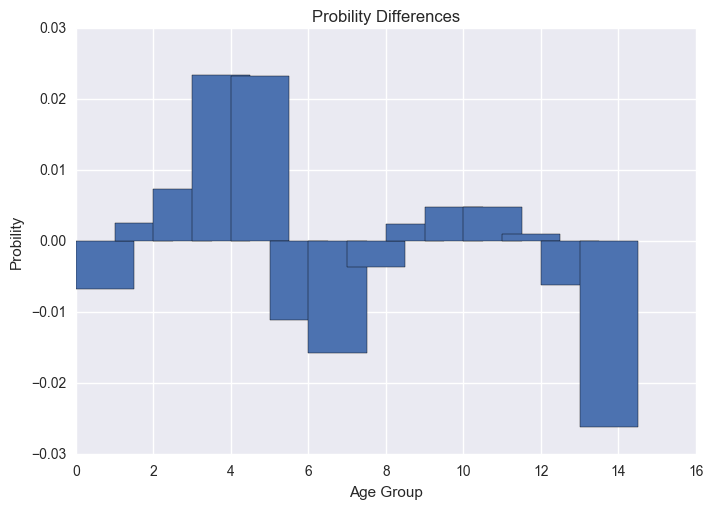

In [26]:
plt.bar(range(len(probaibilty_difference)),probaibilty_difference, width=1.5)
plt.ylabel('Probility')
plt.xlabel('Age Group')
plt.title('Probility Differences')

In [31]:
df_zone_age = pd.DataFrame[['zone','under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years']]

TypeError: 'type' object is not subscriptable

In [32]:
columns = ['zone','under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years']

In [34]:
df2 = pd.DataFrame(columns=columns)

In [35]:
df2

,zone,under_5_years,5-9_years,10-14_years,15-19_years,20-24_years,25-29_years,30-34_years,35-39_years,40-44_years,45-49_years,50-54_years,55-59_years,60-64_years,over_65_years


In [37]:
df2.loc[-1] = [df_LHW]

ValueError: cannot set a row with mismatched columns

In [76]:
target['under_5_years'].sum()/540547755

0.04738689183900135

In [77]:
target['5-9_years'].sum()/540547755

0.035415074473854766

In [78]:
target['10-14_years'].sum()/540547755

0.0312727651602216

In [80]:
target['15-19_years'].sum()/540547755

0.04343809179264837

In [81]:
target['20-24_years'].sum()/540547755

0.08581579808799687

In [82]:
target['25-29_years'].sum()/540547755

0.12730690741653344

In [83]:
target['30-34_years'].sum()/540547755

0.10836075158613877

In [75]:
target['35-39_years'].sum()/540547755

0.08424227198945633

In [84]:
target['40-44_years'].sum()/540547755

0.07207551717609113

In [85]:
target['45-49_years'].sum()/540547755

0.06548583297695872

In [86]:
target['50-54_years'].sum()/540547755

0.06080245213487197

In [87]:
target['55-59_years'].sum()/540547755

0.05737072758724158

In [88]:
target['60-64_years'].sum()/540547755

0.053404473023849666

In [89]:
target['over_65_years'].sum()/540547755

0.12762244475513546

### 540,547,755

In [90]:
prob_age_NY = np.array([0.04738689183900135,0.035415074473854766,0.0312727651602216,0.04343809179264837,0.08581579808799687,0.12730690741653344,
                       0.10836075158613877,0.08424227198945633,0.07207551717609113,0.06548583297695872,0.06080245213487197,0.05737072758724158,
                       0.053404473023849666,0.12762244475513546])

In [94]:
(df.zone.unique())

array([104, 105, 156,  17,  50,  48, 197, 186,  52,  80,  72,  64, 180,
         1,  58, 200,  87, 120,  86,  14, 212, 213,  45, 181, 185, 124,
       145, 126, 125, 123, 182, 188, 189, 106, 107, 147, 176, 191, 190,
       115,  16, 194,  77,  69, 162,  70, 211,   5,  35,  37, 132, 103,
       101, 109, 110, 150, 108, 164, 183,  93,  31,  30, 112,  63,   0,
       111, 205, 206, 140,  83, 128, 134,  46,  59,  26,  38,  22,   9,
       178,  19,  54, 187, 198, 196,  71,  85,  25,  76,  12,  49,  95,
       117, 177,  53,  78,  20,  96,  84,  68, 138,   6,  66,  32, 184,
       146, 113, 201,  41, 195, 152, 154,  60,  36,  23,  88, 169,  28,
       131, 175, 179,  98, 141, 153,   3,  43, 142, 143,  33, 157, 130,
        91,  90,  40, 151,  29, 114, 163,  47, 119,  56,  10,  89, 210,
       160,  51,  55, 172, 207,  99,  74,  75,  42, 208, 149, 173, 166,
       199, 155,  94, 135,  21,  13, 116, 171, 127, 148,   8, 193, 192,
        92,  39, 137,  57,  79,  15, 139, 204,  18, 165, 174, 20

In [115]:
df_104 = df.loc[df['zone'] == 104]

In [118]:
df2 = df.append(target)

In [119]:
df_104 = df2.loc[df2['zone'] == 104]

# 

In [120]:
df_104

,10-14_years,100000_to_149999,10000_to_14999,15-19_years,150000_to_199999,15000_to_24999,20-24_years,200000_or_more,25-29_years,25000_to_34999,...,median_income,nta_code,nta_name,over_65_years,people_per_acre,pickup_location_id,population,service_zone,under_5_years,zone
0,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
1,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
2,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
5,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
6,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
12,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
14,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
15,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
16,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0
21,NaN,7056.0,1127.0,NaN,3654.0,2026.0,NaN,10674.0,NaN,2232.0,...,98797.0,101.0,79.0,NaN,157.8,140.0,80771.0,1.0,NaN,104.0


## Set the target columns

In [23]:
target = df[['under_5_years', '5-9_years',
       '10-14_years', '15-19_years', '20-24_years', '25-29_years',
       '30-34_years', '35-39_years', '40-44_years', '45-49_years',
       '50-54_years', '55-59_years', '60-64_years', 'over_65_years']]

## Pandas Split Dataframe into two Dataframes


In [34]:
train = df1.iloc[:7000]

test = df1.iloc[7000:]

## Split into train and test datasets

In [36]:
train.shape

(7000, 40)

In [37]:
test.shape

(3000, 40)

## Drop the target columns from the training and test dataset

In [39]:
df2 = train.drop(target,axis = 1)
test2 = test.drop(target,axis = 1) 

## Join the two datasets

In [40]:
df = df2.append(test2, ignore_index = True)

In [41]:
df.dtypes

Time                   object
pickup_location_id      int64
dispatch_base          object
affiliate_base         object
borough_x              object
zone                   object
service_zone           object
nta_code               object
nta_name               object
borough_y              object
population              int64
median_age              int64
people_per_acre       float64
households              int64
less_than_10,000        int64
10000_to_14999          int64
15000_to_24999          int64
25000_to_34999          int64
35000_to_49999          int64
50000_to_74999          int64
75000_to_99999          int64
100000_to_149999        int64
150000_to_199999        int64
200000_or_more          int64
median_income           int64
mean_income             int64
dtype: object

#### Categorical variables as integers

In [43]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
df['Time'] = class_le.fit_transform(df['Time'].values)
df['borough_y'] = class_le.fit_transform(df['borough_y'].values)
df['nta_name'] = class_le.fit_transform(df['nta_name'].values)
df['nta_code'] = class_le.fit_transform(df['nta_code'].values)
df['service_zone'] = class_le.fit_transform(df['service_zone'].values)
df['zone'] = class_le.fit_transform(df['zone'].values)
df['dispatch_base'] = class_le.fit_transform(df['dispatch_base'].values)
#df['affiliate_base'] = class_le.fit_transform(df['affiliate_base'].values)
df['borough_x'] = class_le.fit_transform(df['borough_x'].values)

In [44]:
df= df.drop('affiliate_base',axis =1)

In [46]:
df.head()

,Time,pickup_location_id,dispatch_base,borough_x,zone,service_zone,nta_code,nta_name,borough_y,population,...,15000_to_24999,25000_to_34999,35000_to_49999,50000_to_74999,75000_to_99999,100000_to_149999,150000_to_199999,200000_or_more,median_income,mean_income
0,1973,140,4,2,104,1,101,79,2,80771,...,2026,2232,3032,5984,4880,7056,3654,10674,98797,157345
1,1748,140,1,2,104,1,101,79,2,80771,...,2026,2232,3032,5984,4880,7056,3654,10674,98797,157345
2,836,140,2,2,104,1,101,79,2,80771,...,2026,2232,3032,5984,4880,7056,3654,10674,98797,157345
3,1805,141,2,2,105,1,101,79,2,80771,...,2026,2232,3032,5984,4880,7056,3654,10674,98797,157345
4,3938,141,3,2,105,1,101,79,2,80771,...,2026,2232,3032,5984,4880,7056,3654,10674,98797,157345


#### Normalize

In [47]:
from sklearn import preprocessing
normalized_df = preprocessing.normalize(df)

##### Split the train and test data sets

In [48]:
X = normalized_df[:train.shape[0]]
test1 = normalized_df[train.shape[0]:]

In [50]:
target_train = target[:train.shape[0]]
target_test = target[train.shape[0]:]

In [51]:
print (str(len(X))+" rows for training set")
print (str(len(test1))+" rows for test set")
print (str(len(target_train))+" rows for target")

7000 rows for training set
3000 rows for test set
7000 rows for target


#### Split the data set for checking the score

In [52]:
offset = int(X.shape[0] * 0.9)
X_train, y_train = X[:offset], target[:offset]
X_test, y_test = X[offset:], target[offset:]

In [53]:
print (str(len(X_train))+" rows for training set")
print (str(len(y_train))+" rows for test set")

6300 rows for training set
6300 rows for test set


##### Fit regression model

In [54]:
from sklearn.linear_model import ElasticNet
model = ElasticNet(alpha=.001,random_state=5)

model.fit(X_train, y_train)
prediction_test = clf.predict(X_test)
mse = mean_squared_error(y_test, prediction_test )
print("MSE: %.4f" % mse)

NameError: name 'clf' is not defined